In [24]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import modelling as mdl
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import tree
import sklearn
from sklearn.experimental import enable_hist_gradient_boosting
import tkinter
import plotly
import statsmodels.api as sma
from importlib import reload
import tensorflow
import keras

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
MLdbP = mdl.MLdata('../data_sets/feats/')
MLdbP.load_datasets()
MLdbP.combine_datasets()


In [26]:
parkhaven = MLdbP.datadict['ALL'].iloc[:,2:]
parkhaven.columns = [str(col) + '_PH' for col in parkhaven.columns]
parkhaven = parkhaven[parkhaven.columns.drop(list(parkhaven.filter(regex='t+')))]



In [27]:
MLdb = mdl.MLdata(path = 'E:/Rprojects/zoutindringing-parksluizen/data_sets_boezem/features/')
features= ('knmi_feats','gemaal_feats',)
# features = tuple()
MLdb.load_beukelsbrug_data(start = '2018',features= features)

loading beukelsbrug
knmi_feats
gemaal_feats


In [28]:
MLdb.dataset = pd.concat([MLdb.dataset,parkhaven],axis =1 , join = 'inner')

In [29]:
print(len(MLdb.dataset.columns))
MLdb.clean_columns()
print(len(MLdb.dataset.columns))
MLdb.drop_na()
print(len(MLdb.dataset.columns))
MLdb.create_train_test_split(0.8)
MLdb.scale_data(mode = 'y',scaler = 'minmax')
y_pred_naive = MLdb.naive_predictive(ycol = 'beukelsbrug_EGV_OPP')


397
394
394


In [30]:
print(len(MLdb.train_x.columns))
# MLdb.get_VIF(keep=True)
# MLdb.calc_VIF(80)
# print(len(MLdb.VIF))
print(len(MLdb.train_x.columns))

274
274


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

120


<AxesSubplot:>

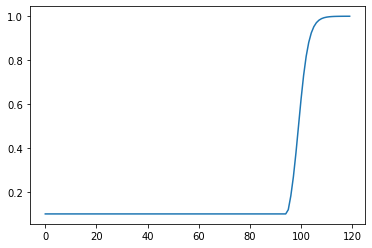

In [32]:
bereik = MLdb.train_y.shape[1]+1
xrange = (list(range(1,bereik)))
exp = 8
offset = 6*2
k = 0.5
# weights = list(map(lambda x : min(1.0,max(0.1,(x+offset)**exp/(bereik-1)**exp)),xrange))
weights = list(map(lambda x : max(0.1,(bereik/(1+(math.e**(-k*(x-100))))/bereik)),xrange))
# weights =[1]*(bereik-1)
print(len(weights))
pd.Series(weights).plot()

In [33]:


path_checkpoint = "model_checkpoint_beukelsbrug.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

Index(['beukelsbrug_EGV_OPP', '"OW062C000/WNS3838 - gemeten waarde [°C]"',
       '"OW062C000/WNS7670 - gemeten waarde [mS/cm]".1',
       '"OW062C000/WNS3838 - gemeten waarde [°C]".1',
       'beukelsbrug_EGV_OPP_diff_order_1_lag_1',
       'beukelsbrug_EGV_OPP_diff_order_2_lag_1',
       'beukelsbrug_EGV_OPP_lag_1_start_1',
       'beukelsbrug_EGV_OPP_lag_2_start_1',
       'beukelsbrug_EGV_OPP_lag_3_start_1',
       'beukelsbrug_EGV_OPP_lag_4_start_1',
       ...
       'hour_PH', 'hour_sin_PH', 'hour_cos_PH', 'weekday_PH', 'weekday_sin_PH',
       'weekday_cos_PH', 'EGV_OPP_diff_order_1_lag_1_PH',
       'EGV_OPP_diff_order_2_lag_1_PH', 'TEMP_OPP_diff_order_1_lag_1_PH',
       'TEMP_OPP_diff_order_2_lag_1_PH'],
      dtype='object', length=274)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 274)               75350     
_________________________________________________________________
dropout_6 (Dropout)          (None, 274)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 274)               75350     
_________________________________________________________________
dropout_7 (Dropout)          (None, 274)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 274)               75350     
_________________________________________________________________
dropout_8 (Dropout)          (None, 274)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 274)              

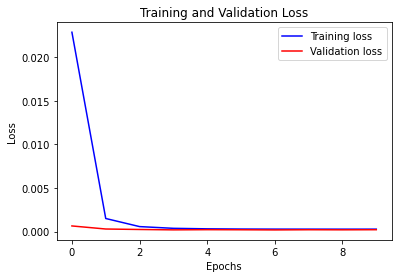

In [34]:
look_back = 1
trainY = np.array(MLdb.train_y)
# create and fit the LSTM network
model = Sequential()
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))
model.add(Dense(MLdb.train_x.shape[1],input_shape=(MLdb.train_x.shape[1],)))
model.add(keras.layers.Dropout(rate=0.5))




model.add(Dense(MLdb.train_y.shape[1]))
model.compile(loss=tensorflow.keras.losses.MeanSquaredError(), 
    optimizer=tensorflow.keras.optimizers.Adam(
        learning_rate= 0.0001),
    loss_weights = weights
    )
# model.build(input_shape = (1,1,12))
model.summary()
history = model.fit(MLdb.train_x, MLdb.train_y_scaled, 
    epochs=10, 
    batch_size=64, 
    verbose=2,
    validation_data=(MLdb.test_x,np.array(MLdb.test_y_scaled)),
    callbacks=[es_callback, modelckpt_callback]
    )
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")

Index(['beukelsbrug_EGV_OPP', '"OW062C000/WNS3838 - gemeten waarde [°C]"',
       '"OW062C000/WNS7670 - gemeten waarde [mS/cm]".1',
       '"OW062C000/WNS3838 - gemeten waarde [°C]".1', 'beukelsbrug_(t+6)',
       'beukelsbrug_(t+12)', 'beukelsbrug_(t+18)', 'beukelsbrug_(t+24)',
       'beukelsbrug_(t+30)', 'beukelsbrug_(t+36)',
       ...
       'hour_PH', 'hour_sin_PH', 'hour_cos_PH', 'weekday_PH', 'weekday_sin_PH',
       'weekday_cos_PH', 'EGV_OPP_diff_order_1_lag_1_PH',
       'EGV_OPP_diff_order_2_lag_1_PH', 'TEMP_OPP_diff_order_1_lag_1_PH',
       'TEMP_OPP_diff_order_2_lag_1_PH'],
      dtype='object', length=394)

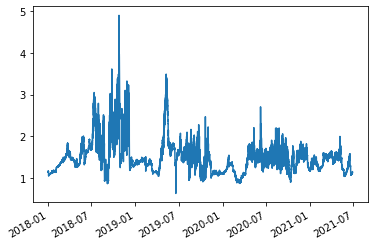

In [35]:
MLdb.train['beukelsbrug_EGV_OPP'].plot()
MLdb.train.columns


In [36]:
with tensorflow.device("cpu:0"):
    y_pred_train = pd.DataFrame(model.predict(MLdb.train_x))
    y_pred = pd.DataFrame(model.predict(MLdb.test_x))

In [37]:
y_pred_unscaled =  pd.DataFrame(MLdb.scaler_y.inverse_transform(y_pred))
y_pred_train_unscaled =  pd.DataFrame(MLdb.scaler_y.inverse_transform(y_pred_train))

<Figure size 432x288 with 0 Axes>

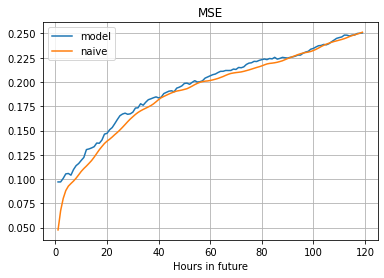

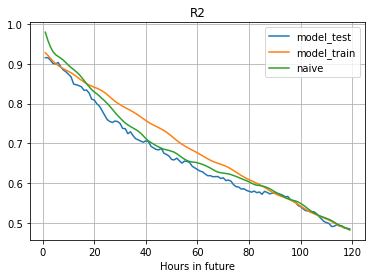

<Figure size 432x288 with 0 Axes>

In [38]:
mape_list = []
R2_list = []
R2_train_list = []
mape_list_naive = []
R2_list_naive = []

# y_pred_train = model.predict(MLdb.train_x)
# y_pred_train = pd.DataFrame(model.predict(np.reshape(np.array(MLdb.train_x),(MLdb.train_x.shape[0],1,MLdb.train_x.shape[1]))))
# y_pred_train = pd.DataFrame(MLdb.scaler.inverse_transform(pd.DataFrame(model.predict(train_data_gen))))


for i in range(0,MLdb.test_y.shape[1]-1):
    # test_y = MLdb.test_y.iloc[:,i].values
    # train_y = MLdb.train_y.iloc[:,i].values
    # pred_y = y_pred.iloc[:,i]
    # pred_y_train = y_pred_train.iloc[:,1]
    # pred_y_naive = y_pred_naive.iloc[:,i]
    test_y = MLdb.test_y.iloc[:,i].values
    train_y = MLdb.train_y.iloc[:,i].values
    pred_y = y_pred_unscaled.iloc[:,i]
    pred_y_train = y_pred_train_unscaled.iloc[:,1]
    pred_y_naive = y_pred_naive.iloc[:,i]
    
    mape_list.append(mse(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    mape_list_naive.append(mse(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))
    R2_train_list.append(r2_score(train_y,pred_y_train))

R2_list = np.array(R2_list).clip(min=0)

stride = 6
x_bereik = [(i*10*stride+10*stride)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,mape_list,label = 'model')
plt.plot(x_bereik,mape_list_naive,label = 'naive')
plt.title('MSE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model_test')
plt.plot(x_bereik,R2_train_list,label ='model_train')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [39]:
MLdb.model = model
with tensorflow.device('/cpu:0'):
    MLdb.create_predictions()


In [40]:
stride

6

In [41]:
MLdb.train_y.columns

Index(['beukelsbrug_(t+6)', 'beukelsbrug_(t+12)', 'beukelsbrug_(t+18)',
       'beukelsbrug_(t+24)', 'beukelsbrug_(t+30)', 'beukelsbrug_(t+36)',
       'beukelsbrug_(t+42)', 'beukelsbrug_(t+48)', 'beukelsbrug_(t+54)',
       'beukelsbrug_(t+60)',
       ...
       'beukelsbrug_(t+666)', 'beukelsbrug_(t+672)', 'beukelsbrug_(t+678)',
       'beukelsbrug_(t+684)', 'beukelsbrug_(t+690)', 'beukelsbrug_(t+696)',
       'beukelsbrug_(t+702)', 'beukelsbrug_(t+708)', 'beukelsbrug_(t+714)',
       'beukelsbrug_(t+720)'],
      dtype='object', length=120)

2021-08-24 03:50:00
len nan+pred: 1009
                     beukelsbrug_EGV_OPP     ypred
2021-08-29 00:40:00                1.362       NaN
2021-08-29 00:50:00                1.365  1.194553
2021-08-29 01:00:00                1.357       NaN
2021-08-29 01:10:00                1.361       NaN
2021-08-29 01:20:00                1.368       NaN
2021-08-29 01:30:00                1.357       NaN
2021-08-29 01:40:00                1.348       NaN
2021-08-29 01:50:00                1.361  1.193715
2021-08-29 02:00:00                1.351       NaN
2021-08-29 02:10:00                1.350       NaN
2021-08-29 02:20:00                1.351       NaN
2021-08-29 02:30:00                1.347       NaN
2021-08-29 02:40:00                1.364       NaN
2021-08-29 02:50:00                1.373  1.193428
2021-08-29 03:00:00                1.385       NaN
2021-08-29 03:10:00                1.378       NaN
2021-08-29 03:20:00                1.378       NaN
2021-08-29 03:30:00                1.380   

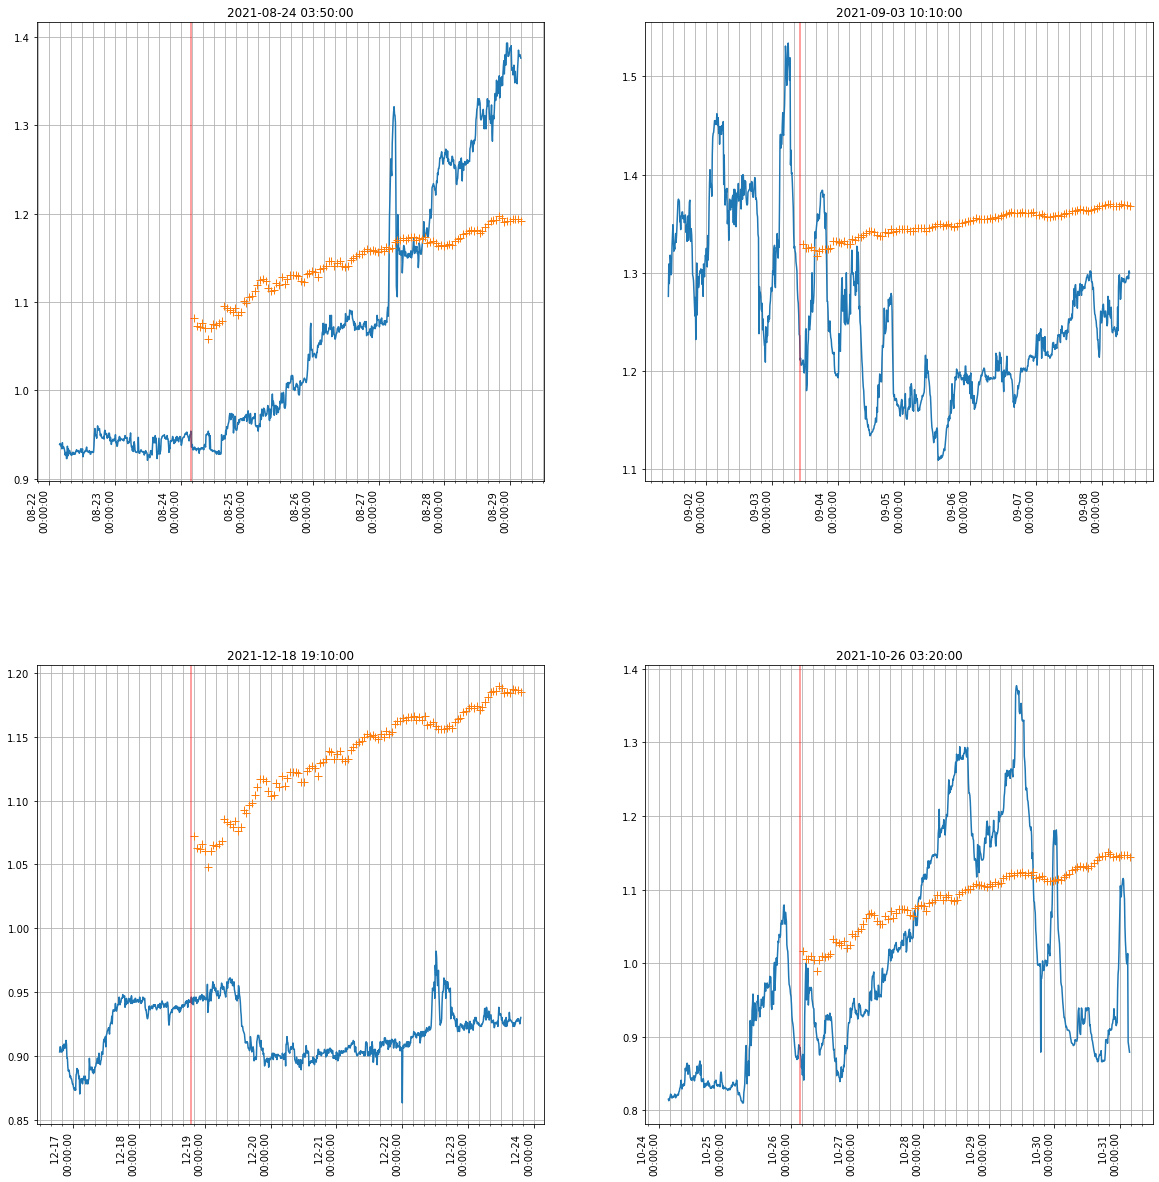

In [43]:
rows = 2
cols = 2
yscale = 1
xscale = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(yscale*1920/my_dpi, xscale*1080/my_dpi))

for row in range(rows):
    for col in range(cols):
        startdate = MLdb.get_random_date('test')
        print(startdate)
        comp = MLdb.predict_window2(past = 2,startdate = startdate,target_var = 'beukelsbrug_EGV_OPP',stride=stride)
        # comp = comp.iloc[250:350,:]
        print(comp.shape)
        # plot = comp.plot(ax = ax[row,col], legend = False,x_compat = True,marker='o')
        plot = comp.plot(y= comp.columns[0],ax = ax[row,col], legend = False,x_compat = True)
        comp.plot(y= comp.columns[1],ax = ax[row,col], legend = False,x_compat = True,marker='+',markersize = 8)


        plot.set(xlabel=None)
        # plot.xaxis.get_ticklocs(minor=True)
        plot.set_title(str(startdate))
        # plot.minorticks_on()
        plot.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
        plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d \n%H:%M:%S'))


        plot.tick_params(axis='x',labelsize = 10,labelrotation= 90)
        plot.grid(which = 'both')
        plot.axvline(startdate,color = 'red',alpha = 0.5)

plt.subplots_adjust(hspace=0.4)
plt.show()


<AxesSubplot:>

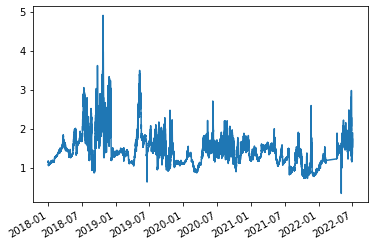

In [ ]:
MLdb.x_dataset['beukelsbrug_EGV_OPP'].plot()

In [ ]:
MLdb.x_dataset.columns

Index(['beukelsbrug_EGV_OPP', '"OW062C000/WNS3838 - gemeten waarde [°C]"',
       '"OW062C000/WNS7670 - gemeten waarde [mS/cm]".1',
       '"OW062C000/WNS3838 - gemeten waarde [°C]".1',
       'beukelsbrug_EGV_OPP_diff_order_1_lag_1',
       'beukelsbrug_EGV_OPP_diff_order_2_lag_1',
       'beukelsbrug_EGV_OPP_lag_1_start_1',
       'beukelsbrug_EGV_OPP_lag_2_start_1',
       'beukelsbrug_EGV_OPP_lag_3_start_1',
       'beukelsbrug_EGV_OPP_lag_4_start_1',
       ...
       'TEMP_OPP_shifted_72_roll_72_func_range_PH',
       'TEMP_OPP_shifted_72_roll_144_func_range_PH',
       'TEMP_OPP_shifted_138_roll_6_func_range_PH',
       'TEMP_OPP_shifted_138_roll_12_func_range_PH',
       'TEMP_OPP_shifted_138_roll_72_func_range_PH',
       'TEMP_OPP_shifted_138_roll_144_func_range_PH',
       'TEMP_OPP_shifted_144_roll_6_func_range_PH',
       'TEMP_OPP_shifted_144_roll_12_func_range_PH',
       'TEMP_OPP_shifted_144_roll_72_func_range_PH',
       'TEMP_OPP_shifted_144_roll_144_func_range_PH'],